Welcome to Daisyworld! This Notebook is modelled after a program called `daisy.m` written by Dennis Hartmann at the University of Washington. It models the computer simulation described in Watson and Lovelock, 1983, Biological homeostasis of the global environment: [The Parable of Daisyworld](https://www.tandfonline.com/doi/abs/10.3402/tellusb.v35i4.14616), Tellus, 35B,  284-289.

Daisyworld is a computer simulation that looks to show that the [Gaia hypothesis](https://en.wikipedia.org/wiki/Gaia_hypothesis) is plausible. That is, living organisms interact with their environment in a way that regulates and stabilizes that environment, thus perpetuating the conditions needed to support life on a planet. In this simulation, the only two kinds of living organisms are black and white daisies. White daisies have a high albedo and so reflect sunlight, while the black daisies absorb light and heat. We can then track how these two types of daisies compete for resources and affect the surface temeprature of the Earth.

For this program, here are some useful variable explanations:
- `area_w` is the areas covered by white daisies
- `area_b` is the areas covered by black daisies
- `area_g` is the remaining fertile ground not covered by daisies
- `growth_rate_` is the growth rate of the black or white daisies
- `death_rate` is the death rate of the daisies


For this program, recall that emission temperature is calculated as: 

$$T_e = (\frac{S_0 (1 - \alpha)}{\sigma})^\frac{1}{4}$$

Then we can get the emission temperature in degrees Celsius by subtracting ~273K. While calculations must be done in Kelvin, we will plot our output in degrees Celsius.

In [1]:
# do an animated graphic for daisy fraction and temperature (2, 1) plot
# **first for no daisies**, then increase TSI (too cold for life at first, black daisies occur first)
# then go the other direction: the answer should change (too hot for life)

#widgets
#https://towardsdatascience.com/bring-your-jupyter-notebook-to-life-with-interactive-widgets-bc12e03f0916
#https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/
#https://towardsdatascience.com/a-very-simple-demo-of-interactive-controls-on-jupyter-notebook-4429cf46aabd

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

While I can't find any evidence that black daisies actually exist, here are what some white and darker-colored daisies might look like:

<tr>
    <td> <img src='daisy_marguerite.jpg' height=1500 width=1500/> </td>
    <td> <img src='osteospermum2.JPG' height=1500 width=1500 /> </td>
</tr>

On the left is is an example of a [Daisy Marguerite](https://en.wikipedia.org/wiki/Argyranthemum), and on the right of an [Osteospermum](https://en.wikipedia.org/wiki/Osteospermum).

### Define Constants

In [3]:
#set variables here
#names for plotting
name_black = 'Black Daisies Only '
name_white = 'White Daisies Only '
name_both = 'Black and White Daisies '
name_neither = 'No Daisies to Start'

#set list to house names
names = [name_black, name_white, name_both, name_neither]

#list/array indexers
i = 0
j = 1

#if change_lumosity is 1, increase lumosity %, if 2 decrease %
change_lumosity = 1

#number of steps to iterate through
steps = 5000

#change in time
delta_t = 0.03

#fractional change in TSI, xaxis on plot
qp = 20.

#Make insolation large, then divide by 4, since you need surfact temperature near 294K
#no GH gases, so S is 3343 W/m^2 to get 20C at one solar constant
s = 3343 
s0 = s / 4

#stefan-boltzmann constant
sigma = 5.67e-8

#death rate of daisies
death_rate = 0.3

#set albedos of daisies here
albedo_b = 0.25
albedo_w = 0.75

#albedo of the dirt or ground
albedo_g = 0.50

#daisy fractions
area_b = [0.2, 0.2, 0]
area_w = [0.2, 0.2, 0]

#initial areas/populations of black and white daisies
area_b_initial = 0.01
area_w_initial = 0.1

#the total fraction of good soil
good_soil = 1.

#how many times to iterate over
iterate = 63
even_odd = 0

### Helper Methods

In [4]:
#pass in a temperature, get out a growth rate
def grow(temp):
    g = 1. - 0.003265 * (22.5 - temp)**2
    grow = max(g, 0.)
    
    return grow

In [5]:
# if black is 1, then set white daisies to 0
# if white is 1, then set black daisies to 0
def zero_area(black, white, area_b, area_w, i, j):
    if black == 1:
        area_w[i] = 0
        area_w[j] = 0
        
    if white == 1:
        area_b[i] = 0
        area_b[j] = 0

In [6]:
#MAIN PROGRAM
def daisyworld(black, white, area_b, area_w, area_b_initial, area_w_initial, albedo_b, albedo_g, albedo_w,
              good_soil, steps, delta_t, death_rate, sigma, s0, qp, change_lumosity, i, j, iterate, even_odd):
    
    #lists to save output to
    xl, ab, aw, tb, tw, te = [], [], [], [], [], []
    
    #set black and white daisy areas to 0 based on variables 'black' and 'white'
    zero_area(black, white, area_b, area_w, i, j)

    #set initial areas for choice of direction
    area_b[i] = area_b_initial
    area_b[j] = area_b_initial

    area_w[i] = area_w_initial
    area_w[j] = area_w_initial
    
    #loop over lumosity
    for idx in range(iterate):
        if change_lumosity == 1:
            xl_ = 0.5 + (idx) * 0.03
        else:
            xl_ = 2.36 - (idx) * 0.03

        #make sure starting value is not 0 so growth can occur
        area_b[i] = area_b_initial
        area_w[i] = area_w_initial

        #set qu: this is the value Watson and Lovelock used
        qu = 0.2 * s0 * xl_ / sigma

        """
        Once a daisy population gets over half the area, we assume that the starting point is the previous value. 
        Since the system is highly nonlinear, the steady solution obtained depends on the initial value chosen.  
        We imagine that we change the solar constant on an existing population of daisies.
        """
        if area_w[j] > area_w_initial:
            area_w[i] = area_w[j]
            area_b[i] = area_b[j]

        if area_b[j] > area_b_initial:
            area_w[i] = area_w[j]
            area_b[i] = area_b[j]

        #loop over time
        for step in range(steps):
            #set black and white daisy areas to 0 based on variables 'black' and 'white'
            zero_area(black, white, area_b, area_w, i, j)

            #get the area of the ground not covered by daisies
            area_g = good_soil - area_w[i] - area_b[i]

            #now calculate albedo
            albedo = (albedo_g * area_g) + (albedo_w * area_w[i]) + (albedo_b * area_b[i])

            #get all temperatures
            #get global emission temperature
            temp_emit = (s0 * xl_ * (1 - albedo) / sigma)**(1/4) - 273

            #fully non-linear form
            #emission temperature of black daisies
            temp_b = (qu * (albedo - albedo_b) + (temp_emit + 273)**4)**0.25 - 273

            #emission temperature of white daisies
            temp_w = (qu * (albedo - albedo_w) + (temp_emit + 273)**4)**0.25 - 273

            #get growth rate
            growth_rate_b = grow(temp_b)
            growth_rate_w = grow(temp_w)

            #now time step area of daisies
            #2=latest time, j=middle time, i=oldest time
            area_b[j] = area_b[i] + delta_t * (area_b[i] * (area_g * growth_rate_b - death_rate))
            area_w[j] = area_w[i] + delta_t * (area_w[i] * (area_g * growth_rate_w - death_rate))

            #switch i and j indices every other time step
            #reset even_odd variable
            if even_odd == 0:
                i += 1
                j -= 1
                even_odd += 1            
            else:
                i -= 1
                j += 1
                even_odd -= 1

            if step > 19:
                diff_daisies = np.abs(area_w[i] - area_w[j]) + np.abs(area_b[i] - area_b[j])

                if diff_daisies < 1.0e-7:
                    #here you could put out the number of steps, if interested
                    pass

        ### Do something for lumosity here?
        #append values to output array for plotting
        xl.append(xl_)
        ab.append(area_b[j])
        aw.append(area_w[j])
        tb.append(temp_b)
        tw.append(temp_w)
        te.append(temp_emit)
    
    #save output list for easy indexing and plotting
    output = [xl, aw, ab, tw, tb, te]
    return output

In [7]:
#input the variables 'black', 'white', and list that holds possible plot names
#output the correct title prefix for plotting
def select_title(black, white, names):
    if np.logical_and(black==1, white==0):
        #set title to name_black
        title = names[0]
    elif np.logical_and(black==0, white==1):
        #set title to name_white
        title = names[1]
    elif np.logical_and(black==0, white==0):
        #set title to name_both
        title = names[2]
    else:
        #set title to name_neither
        title = names[3]
        
    return title

In [8]:
#plot TSI agaist both daisy fraction and temperature
def make_plots(black, white, output, albedo_b, albedo_g, albedo_w, change_lumosity, names):

    #make plot interactive
    %matplotlib notebook

    #define figure and axis subplots to plot onto
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))

    #plot TSI vs black and white daisy area fraction
    ax[0].plot(output[0], output[1], linewidth=1.5, label='Area White')
    ax[0].plot(output[0], output[2], color='r', linewidth=1.5, label='Area Black')
    
    #plot TSI vs temperature: : temp_w, temp_b, temp_emit
    ax[1].plot(output[0], output[3], linewidth=1.5, label='Temp (White)')
    ax[1].plot(output[0], output[4], color='r', linewidth=1.5, label='Temp (Black)')
    ax[1].plot(output[0], output[5], color='gold', linewidth=1.5, label='Emission Temp')
    
    #set xticks
    ax[0].set_xticks([0, 0.5, 1, 1.5, 2, 2.5])
    ax[0].set_xticklabels([0, 0.5, 1, 1.5, 2, 2.5])
    #do the same thing for axis 1
    ax[1].set_xticks([0, 0.5, 1, 1.5, 2, 2.5])
    ax[1].set_xticklabels([0, 0.5, 1, 1.5, 2, 2.5])
    
    #label x and y axes
    ax[0].set_xlabel('TSI')
    ax[0].set_ylabel('Daisy Fraction')
    
    ax[1].set_xlabel('TSI')
    ax[1].set_ylabel('Temperature (C)')

    #select correct title here, used for both plots
    title_main = select_title(black, white, names)

    #main title add-on
    title_to_add = ', albedo_b={}, albedo_g={}, albedo_w={}, change_lumosity={}'.format(albedo_b, albedo_g, albedo_w, change_lumosity)
    
    #set subplot titles here
    ax[0].set_title('Area')
    ax[1].set_title('Temperature')
    
    #add main title here
    plt.suptitle(title_main + title_to_add)

    #add legend to plots
    ax[0].legend()
    ax[1].legend()

    #display plot
    plt.show()

In [9]:
#**TO CHANGE**
#we can change the variables black and white to 0 or 1 here
#if black and white are both 1, then neither exist to start
#if black and white are both 0, then both exist to start
black = 0
white = 0

#call main program here
#NOTE: This is for the forward pass (forward in time). 
#We will need to work on something for coding the backwards pass through time.
output = daisyworld(black, white, area_b, area_w, area_b_initial, area_w_initial, albedo_b, albedo_g, albedo_w,
              good_soil, steps, delta_t, death_rate, sigma, s0, qp, change_lumosity, i, j, iterate, even_odd)

<IPython.core.display.Javascript object>


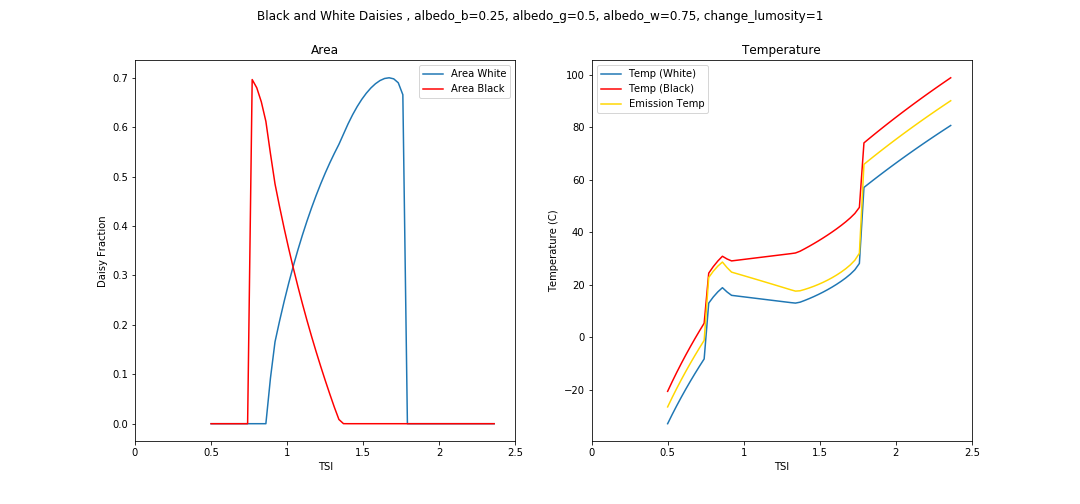

In [11]:
#plot output here
make_plots(black, white, output, albedo_b, albedo_g, albedo_w, change_lumosity, names)

In [12]:
#NEXT STEP: animate plots
#https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c
#https://brushingupscience.com/2016/06/21/matplotlib-animations-the-easy-way/ 